In [33]:
#Cargar librerias
import tensorflow as tf
import numpy as np
import datetime

import tensorflow_hub as hub

print(tf.__version__)
import time

import matplotlib.pylab as plt
import os
import shutil
import random

2.10.0


# -><- Cambiar Origen de Conjunto de Datos  -><-

In [34]:
# Ruta de la carpeta principal que contiene las subcarpetas de clases
folder_path = "../Data/PetroImages_v1"

# Rutas para los subconjuntos de entrenamiento y validación
train_dir = "../Data/PetroImages_v1ST/train"
validation_dir = "../Data/PetroImages_v1ST/validation"

# -><- Cambiar Directorio del modelo  -><-

In [35]:
modelDirectory = "inception_v3_v1"

# -><- Cambiar Porcentaje de validación, semilla  -><-

In [36]:
#Preparar dataset
# Proporción de datos para el conjunto de validación (porcentaje)
validation_split = 0.2
random.seed(123)

# Lista de las subcarpetas/clases
class_folders = os.listdir(folder_path)

# Itera a través de cada subcarpeta/clase
for class_folder in class_folders:
    class_path = os.path.join(folder_path, class_folder)
    if os.path.isdir(class_path):
        # Lista de archivos en la subcarpeta actual
        files = os.listdir(class_path)
        # Baraja (shuffle) los archivos de la clase para dividir aleatoriamente
        random.shuffle(files)
        # Calcula la cantidad de datos para el conjunto de validación
        num_validation = int(len(files) * validation_split)
        if num_validation == 0:
            num_validation = 1
        # Divide los archivos en los conjuntos de entrenamiento y validación
        train_files = files[num_validation:]
        validation_files = files[:num_validation]
        

        # Crea las rutas para las carpetas de entrenamiento y validación
        class_train_dir = os.path.join(train_dir, class_folder)
        class_validation_dir = os.path.join(validation_dir, class_folder)

        # Crea las carpetas de entrenamiento y validación si no existen
        os.makedirs(class_train_dir, exist_ok = True)
        os.makedirs(class_validation_dir, exist_ok = True)
        
        # Mueve los archivos a las carpetas correspondientes
        for file in train_files:
            src = os.path.join(class_path, file)
            dst = os.path.join(class_train_dir, file)
            shutil.copy(src, dst)

        for file in validation_files:
            src = os.path.join(class_path, file)
            dst = os.path.join(class_validation_dir, file)
            shutil.copy(src, dst)

# -><- Cambiar Número de lote y dimensión de conjuntos  -><-

In [37]:
#Cargar dataset
#Dividir dataset para entrenamiento y validación  
BATCH_SIZE = 32
IMG_SIZE = (299, 299)

# Crea el conjunto de datos de TensorFlow desde los directorios
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            seed = 123,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

val_ds = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 seed = 123,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 1410 files belonging to 106 classes.
Found 325 files belonging to 106 classes.


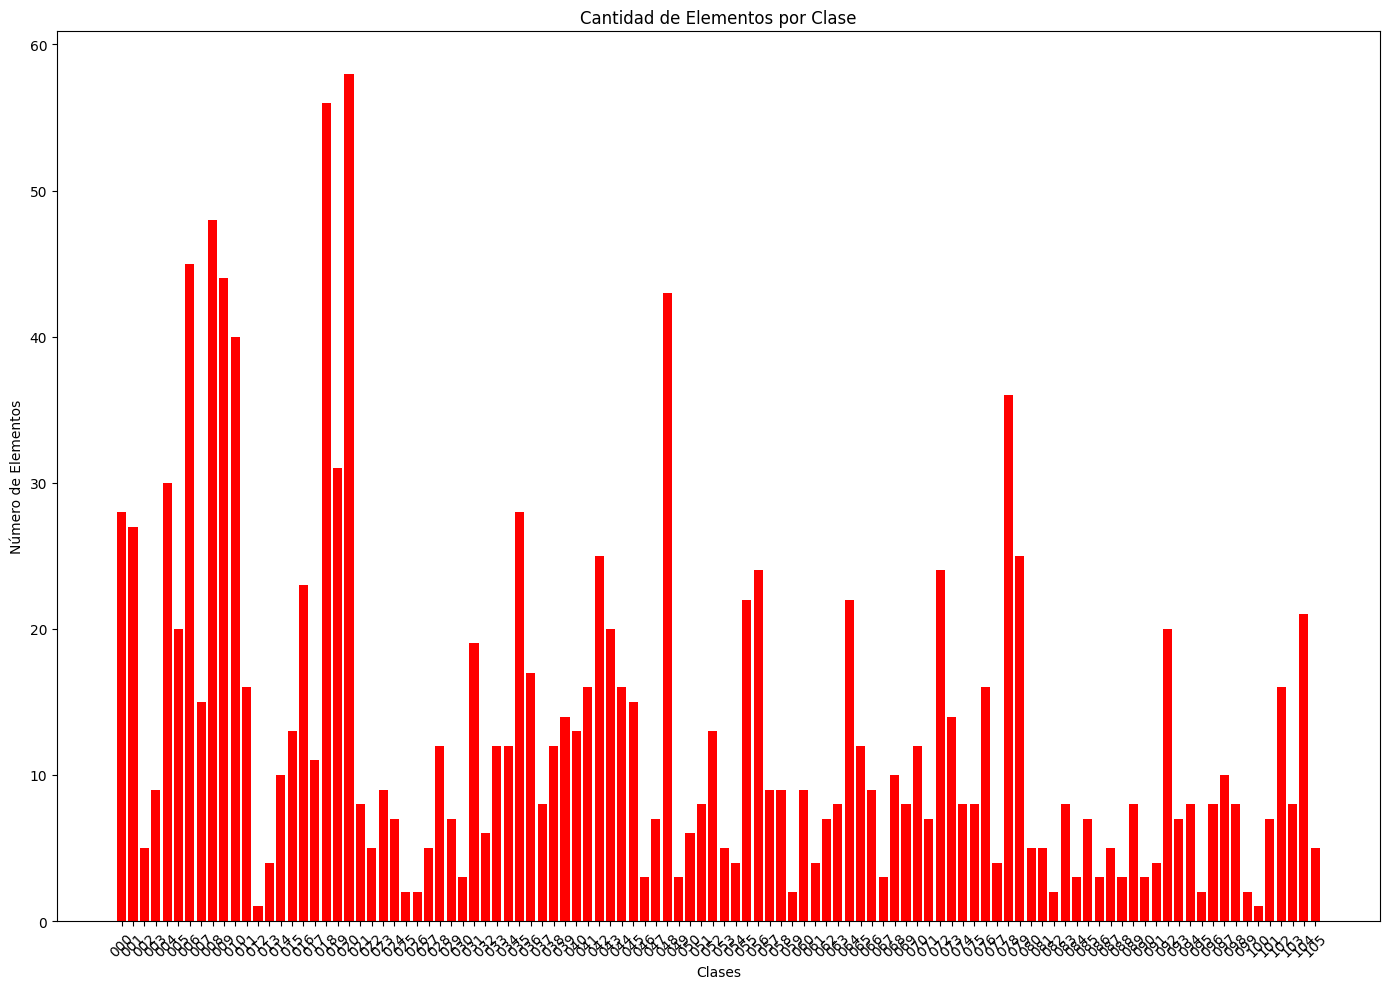

In [38]:
import matplotlib.pyplot as plt

# Lista de nombres de las clases
class_names = np.array(train_ds.class_names)

# Ruta de la carpeta principal
folder_path = train_dir

# Listas para almacenar los nombres de las clases y la cantidad de elementos
class_names_list = []
element_count_list = []

# Itera a través de cada clase
for class_name in class_names:
    class_folder = os.path.join(folder_path, class_name)
    if os.path.exists(class_folder) and os.path.isdir(class_folder):
        # Obtiene la lista de elementos en la carpeta de la clase
        elements = os.listdir(class_folder)
        element_count = len(elements)
        class_names_list.append(class_name)
        element_count_list.append(element_count)

# Crea un gráfico de barras
plt.figure(figsize = (14, 10))
plt.bar(class_names_list, element_count_list, color = 'red')
plt.xlabel('Clases')
plt.ylabel('Número de Elementos')
plt.title('Cantidad de Elementos por Clase')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [39]:
std = np.std(element_count_list)
mean = np.mean(element_count_list)

print('Desviación estándar: ', std)
print('Media: ', mean)

cv = std/mean 
print('Coeficiente de variacion: ', cv)

Desviación estándar:  11.96549268972819
Media:  13.30188679245283
Coeficiente de variacion:  0.8995334929866583


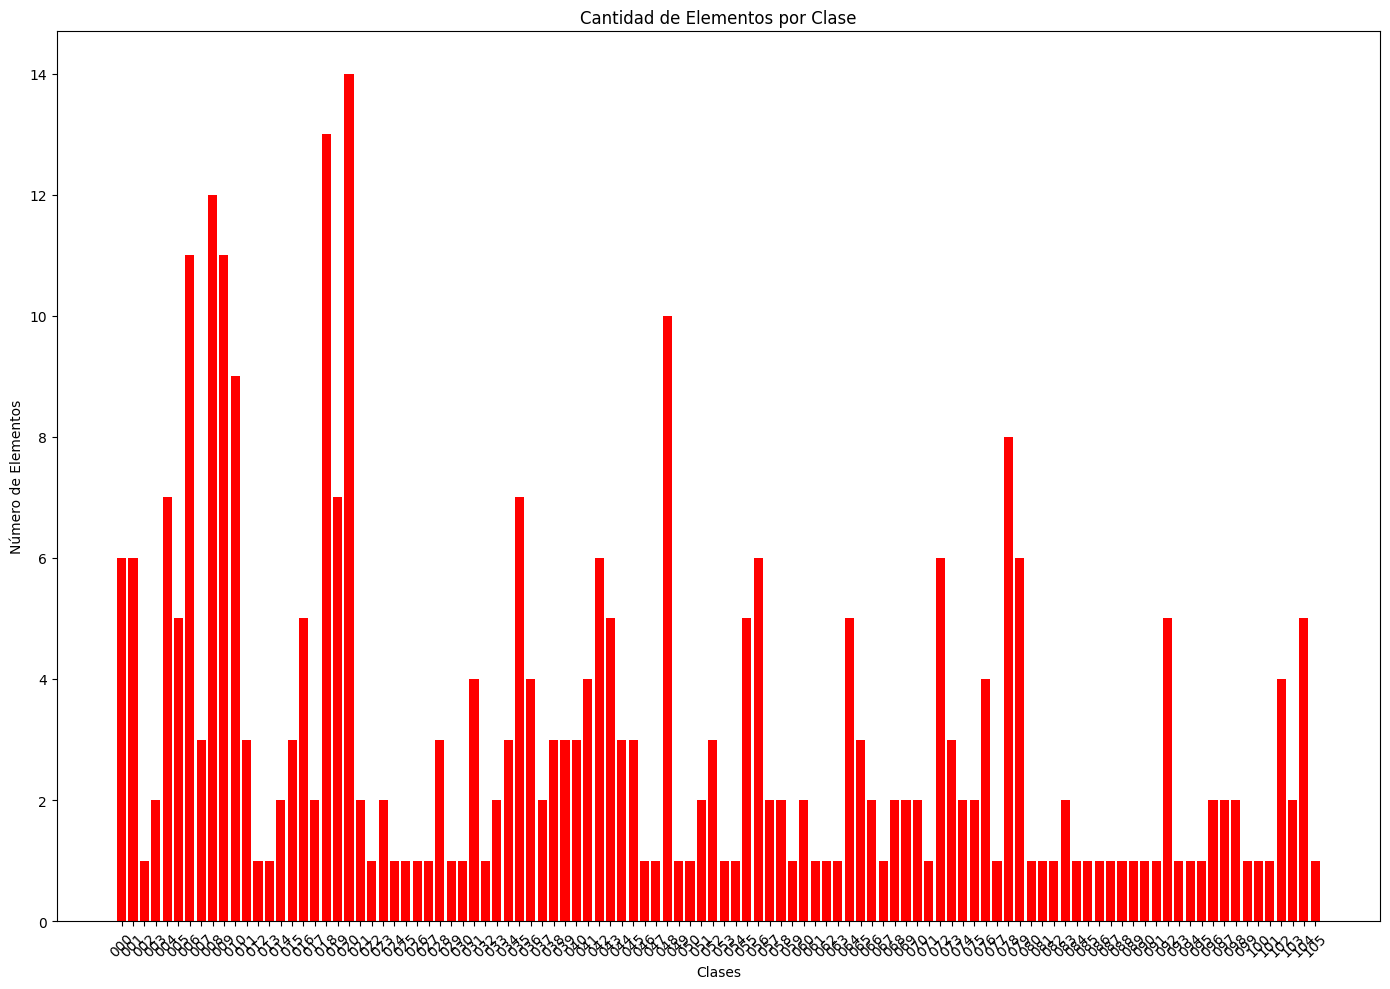

In [40]:
# Lista de nombres de las clases
class_names = np.array(val_ds.class_names)

# Ruta de la carpeta principal
folder_path = validation_dir  # Reemplaza con tu ruta

# Listas para almacenar los nombres de las clases y la cantidad de elementos
class_names_list = []
element_count_list = []

# Itera a través de cada clase
for class_name in class_names:
    class_folder = os.path.join(folder_path, class_name)
    if os.path.exists(class_folder) and os.path.isdir(class_folder):
        # Obtiene la lista de elementos en la carpeta de la clase
        elements = os.listdir(class_folder)
        element_count = len(elements)
        class_names_list.append(class_name)
        element_count_list.append(element_count)

# Crea un gráfico de barras
plt.figure(figsize = (14, 10))
plt.bar(class_names_list, element_count_list, color = 'red')
plt.xlabel('Clases')
plt.ylabel('Número de Elementos')
plt.title('Cantidad de Elementos por Clase')
plt.xticks(rotation = 45)  # Rotar las etiquetas del eje x para mayor claridad

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [41]:
std = np.std(element_count_list)
mean = np.mean(element_count_list)

print('Desviación estándar: ', std)
print('Media: ', mean)

cv = std/mean 
print('Coeficiente de variacion: ', cv)

Desviación estándar:  2.8558740126158395
Media:  3.0660377358490565
Coeficiente de variacion:  0.9314542933454738


In [42]:
class_names = np.array(train_ds.class_names)
print(class_names)

['000' '001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011'
 '012' '013' '014' '015' '016' '017' '018' '019' '020' '021' '022' '023'
 '024' '025' '026' '027' '028' '029' '030' '031' '032' '033' '034' '035'
 '036' '037' '038' '039' '040' '041' '042' '043' '044' '045' '046' '047'
 '048' '049' '050' '051' '052' '053' '054' '055' '056' '057' '058' '059'
 '060' '061' '062' '063' '064' '065' '066' '067' '068' '069' '070' '071'
 '072' '073' '074' '075' '076' '077' '078' '079' '080' '081' '082' '083'
 '084' '085' '086' '087' '088' '089' '090' '091' '092' '093' '094' '095'
 '096' '097' '098' '099' '100' '101' '102' '103' '104' '105']


In [43]:
#Normalizar los datos de entrada en conjuntoS de datos de: entrenamiento (train_ds) y validación (val_ds)
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.

In [44]:
#Mejorar rendimiento 
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [45]:
#Imprimir las formas de los lotes de imágenes y etiquetas
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 299, 299, 3)
(32,)


In [46]:
from tensorflow import keras

# -><- Cambiar Modelo  -><-

In [47]:
#Cargar modelo de extracción de características
inception_v3 = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
feature_extractor_model  = inception_v3

# -><- Cambiar Dimensionalidad de entrada  -><-

In [48]:
#Crear una capa Keras (una capa de extracción de características)
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape = (299, 299, 3),
    trainable = False)

In [49]:
#Definir un modelo de aprendizaje automáticode de dos partes principales: un extractor de características 
#y una capa de clasificación.num_classes = len(class_names)
num_classes = len(class_names)
model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(num_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 106)               217194    
                                                                 
Total params: 22,019,978
Trainable params: 217,194
Non-trainable params: 21,802,784
_________________________________________________________________


# -><- Cambiar directorio de logs  -><-

In [50]:
#Compilar el modelo
#configuración de entrenamiento, la función de pérdida, el optimizador y las métricas de evaluación del modelo.
#Configurar un registro de TensorBoard para el seguimiento del entrenamiento. 

model.compile(
  optimizer = tf.keras.optimizers.Adam(),
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
  metrics = ['acc'])

log_dir = "Logs/" + modelDirectory + "/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1) # Enable histogram computation for every epoch.

# -><- Cambiar Épocas de entrenamiento  -><-

In [51]:
#Definir epocas del entrenamineto
num_epochs = 35

In [52]:
#Entrenar el modelo utilizando los conjuntos de datos de entrenamiento y validación.
#Registro de TensorBoard para el seguimiento del progreso del entrenamiento.
history = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = num_epochs,
                    callbacks = tensorboard_callback)

Epoch 1/35
45/45 [==============================] - 38s 663ms/step - loss: 4.3636 - acc: 0.0865 - val_loss: 3.7191 - val_acc: 0.1938
Epoch 2/35
45/45 [==============================] - 28s 625ms/step - loss: 2.9880 - acc: 0.2965 - val_loss: 3.3383 - val_acc: 0.2431
Epoch 3/35
45/45 [==============================] - 29s 640ms/step - loss: 2.3474 - acc: 0.4376 - val_loss: 3.1643 - val_acc: 0.2708
Epoch 4/35
45/45 [==============================] - 28s 632ms/step - loss: 1.9062 - acc: 0.5369 - val_loss: 3.0714 - val_acc: 0.2831
Epoch 5/35
45/45 [==============================] - 28s 637ms/step - loss: 1.5753 - acc: 0.6312 - val_loss: 3.0205 - val_acc: 0.2954
Epoch 6/35
45/45 [==============================] - 28s 633ms/step - loss: 1.3212 - acc: 0.7241 - val_loss: 2.9928 - val_acc: 0.2985
Epoch 7/35
45/45 [==============================] - 28s 629ms/step - loss: 1.1227 - acc: 0.7872 - val_loss: 2.9805 - val_acc: 0.2985
Epoch 8/35
45/45 [==============================] - 28s 631ms/step - 

In [53]:
#Cargar iblioteca de graficos
import matplotlib.pyplot as plt
import time

In [54]:
#Cargar y recargar la extensión de TensorBoard
%load_ext tensorboard
%reload_ext tensorboard

# -><- Cambiar Directorio de logs  -><-

In [55]:
#iniciar TensorBoard y especificar la ubicación de los registros de entrenamiento y puerto.
%tensorboard --logdir Logs/inception_v3_v1/fit --port=6004 #--host localhost
#%tensorboard --logdir {logs_base_dir}  --host localhost

Reusing TensorBoard on port 6004 (pid 55956), started 9 days, 4:45:27 ago. (Use '!kill 55956' to kill it.)

In [56]:
#Realizar predicciones en el conjunto de datos de validación utilizando el modelo entrenado previamente.

In [57]:
predicted_val = model.predict(val_ds)
predicted_id = tf.math.argmax(predicted_val, axis =- 1)
predicted_label = class_names[predicted_id]
print(len(predicted_label))
print(predicted_label)

11/11 [==============================] - 5s 450ms/step
325
['015' '006' '009' '008' '042' '055' '072' '016' '056' '102' '008' '048'
 '076' '000' '009' '064' '015' '041' '018' '036' '042' '018' '010' '104'
 '055' '000' '048' '072' '034' '020' '005' '035' '010' '019' '006' '042'
 '018' '072' '070' '033' '076' '010' '008' '035' '015' '073' '048' '018'
 '103' '028' '104' '018' '019' '010' '048' '004' '018' '064' '019' '064'
 '006' '006' '009' '020' '005' '015' '020' '041' '064' '042' '102' '076'
 '009' '016' '078' '008' '009' '016' '009' '035' '009' '072' '045' '048'
 '060' '064' '015' '000' '020' '056' '019' '036' '009' '008' '043' '020'
 '066' '072' '011' '008' '055' '035' '005' '005' '018' '010' '020' '035'
 '092' '005' '018' '004' '004' '007' '020' '006' '048' '018' '102' '055'
 '044' '001' '010' '040' '006' '018' '006' '018' '056' '078' '018' '010'
 '040' '006' '018' '000' '031' '078' '009' '045' '048' '064' '000' '004'
 '092' '057' '016' '048' '005' '005' '020' '005' '018' '048' '018

In [58]:
#Visualizar imágenes del conjunto de datos de validación junto con sus etiquetas reales y las etiquetas predichas por el modelo.

In [59]:
# Inicializa una variable para contar las imágenes
num_images = 0

# Itera a través del conjunto de datos y cuenta las imágenes
for batch in val_ds:
    num_images += batch[0].shape[0]

print("Número de imágenes en el conjunto de datos:", num_images)

Número de imágenes en el conjunto de datos: 325


# -><- Cambiar Filas y columnas  -><-

In [60]:
#Visualizar imágenes del conjunto de datos de validación junto con sus etiquetas reales y las etiquetas predichas por el modelo.
plt.figure(figsize=(50, 200))
plt.subplots_adjust(hspace = 1.5)
plt.subplots_adjust(wspace = 1.5)
batch_number = 0
real_labels = np.empty(shape = num_images, dtype = np.int8)
for image_batch, labels_batch in val_ds:
    for i in range(labels_batch.shape[0]):
        ax = plt.subplot(29, 12, i + 1 + batch_number)
        plt.imshow(image_batch[i])
        plt.title("pred: " + str(int(predicted_label[i])) + " | real: " + str(labels_batch[i].numpy()), fontsize=10)
        real_labels[batch_number + i] = int(labels_batch[i].numpy())
        plt.axis("off")
    batch_number = batch_number + BATCH_SIZE

In [61]:
#Almacenar las etiquetas predichas por el modelo como enteros.
predicted_label_cm = np.empty(shape = num_images, dtype = np.int8)
for i in range(len(predicted_label_cm)):
    predicted_label_cm[i] = int(predicted_label[i])
print(predicted_label_cm)

[ 15   6   9   8  42  55  72  16  56 102   8  48  76   0   9  64  15  41
  18  36  42  18  10 104  55   0  48  72  34  20   5  35  10  19   6  42
  18  72  70  33  76  10   8  35  15  73  48  18 103  28 104  18  19  10
  48   4  18  64  19  64   6   6   9  20   5  15  20  41  64  42 102  76
   9  16  78   8   9  16   9  35   9  72  45  48  60  64  15   0  20  56
  19  36   9   8  43  20  66  72  11   8  55  35   5   5  18  10  20  35
  92   5  18   4   4   7  20   6  48  18 102  55  44   1  10  40   6  18
   6  18  56  78  18  10  40   6  18   0  31  78   9  45  48  64   0   4
  92  57  16  48   5   5  20   5  18  48  18  10   8   9   4  64  39  42
  78   6 101  53  55  72  60  18  38  56   6  10   6  42  16  48   6  16
  15   4  92  52  96  72  19   6  35   9  10  48  72   9  28  55  31  42
   8   4   1  97   6  18  55  20   6  19   7   8  10  64  48  18  37  18
  78  18  18  78  35  72   9   8  89  10  45  72  48  35  27  72  18  97
  88  18  58  20  18   8  19  35  48  18  10  45  6

In [62]:
print(real_labels)

[ 15  28   9   8  28  50  72  89  56  21   6  48  76   0   5  78  98  41
  18   1  11  18   6  31  76   0  19  48  20  56   5  75  54 103  35  16
  18  76  18  33   1  10  79  35  15  17  48  23  78  83  55  92  13  10
  48   4 104  64  19  65   6  19   9  52   5  20  20  35  64  42  74  22
   9  17   6  18   1  77  90 102  96  63  55  48  60 104  15   0  20  56
  81  10   9   8  43  20  66  72  73   8  55  35   4   2  69  10  55  41
  43   5  46   4  11  42  70  39  30  18  68  78  44   8   5  40   4  58
  25  56  20  78  18  10  40  45   8   0  31  78   1  45  48  71   0  26
  92  31  16  14  42  16  18   3  57  39  51  99   8  78   4  64  40  42
  47  18  10  59  55  19  60  36  78  83   6  10  86  41  28  36  96  16
   8   4  87  52  43  72  70   6  58  52  44  49  72   9  39  31  75  80
   8   4  29  97  92  93   8  20 102  42  34   8  34  64  79  18  37  65
 101  18 100  67  19  74  10   9   6  11 102  78  79  35  14  72  18  92
  10  38  91  20  98   9  19  42  79  51  18  38  7

In [63]:
#Matriz de confusión utilizando las etiquetas reales y las etiquetas predichas por tu modelo.

In [64]:
print(real_labels.size)
print(predicted_label_cm.size)


325
325


In [65]:
cm = tf.math.confusion_matrix(
    real_labels,
    predicted_label_cm
)

print(cm.numpy())

[[6 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


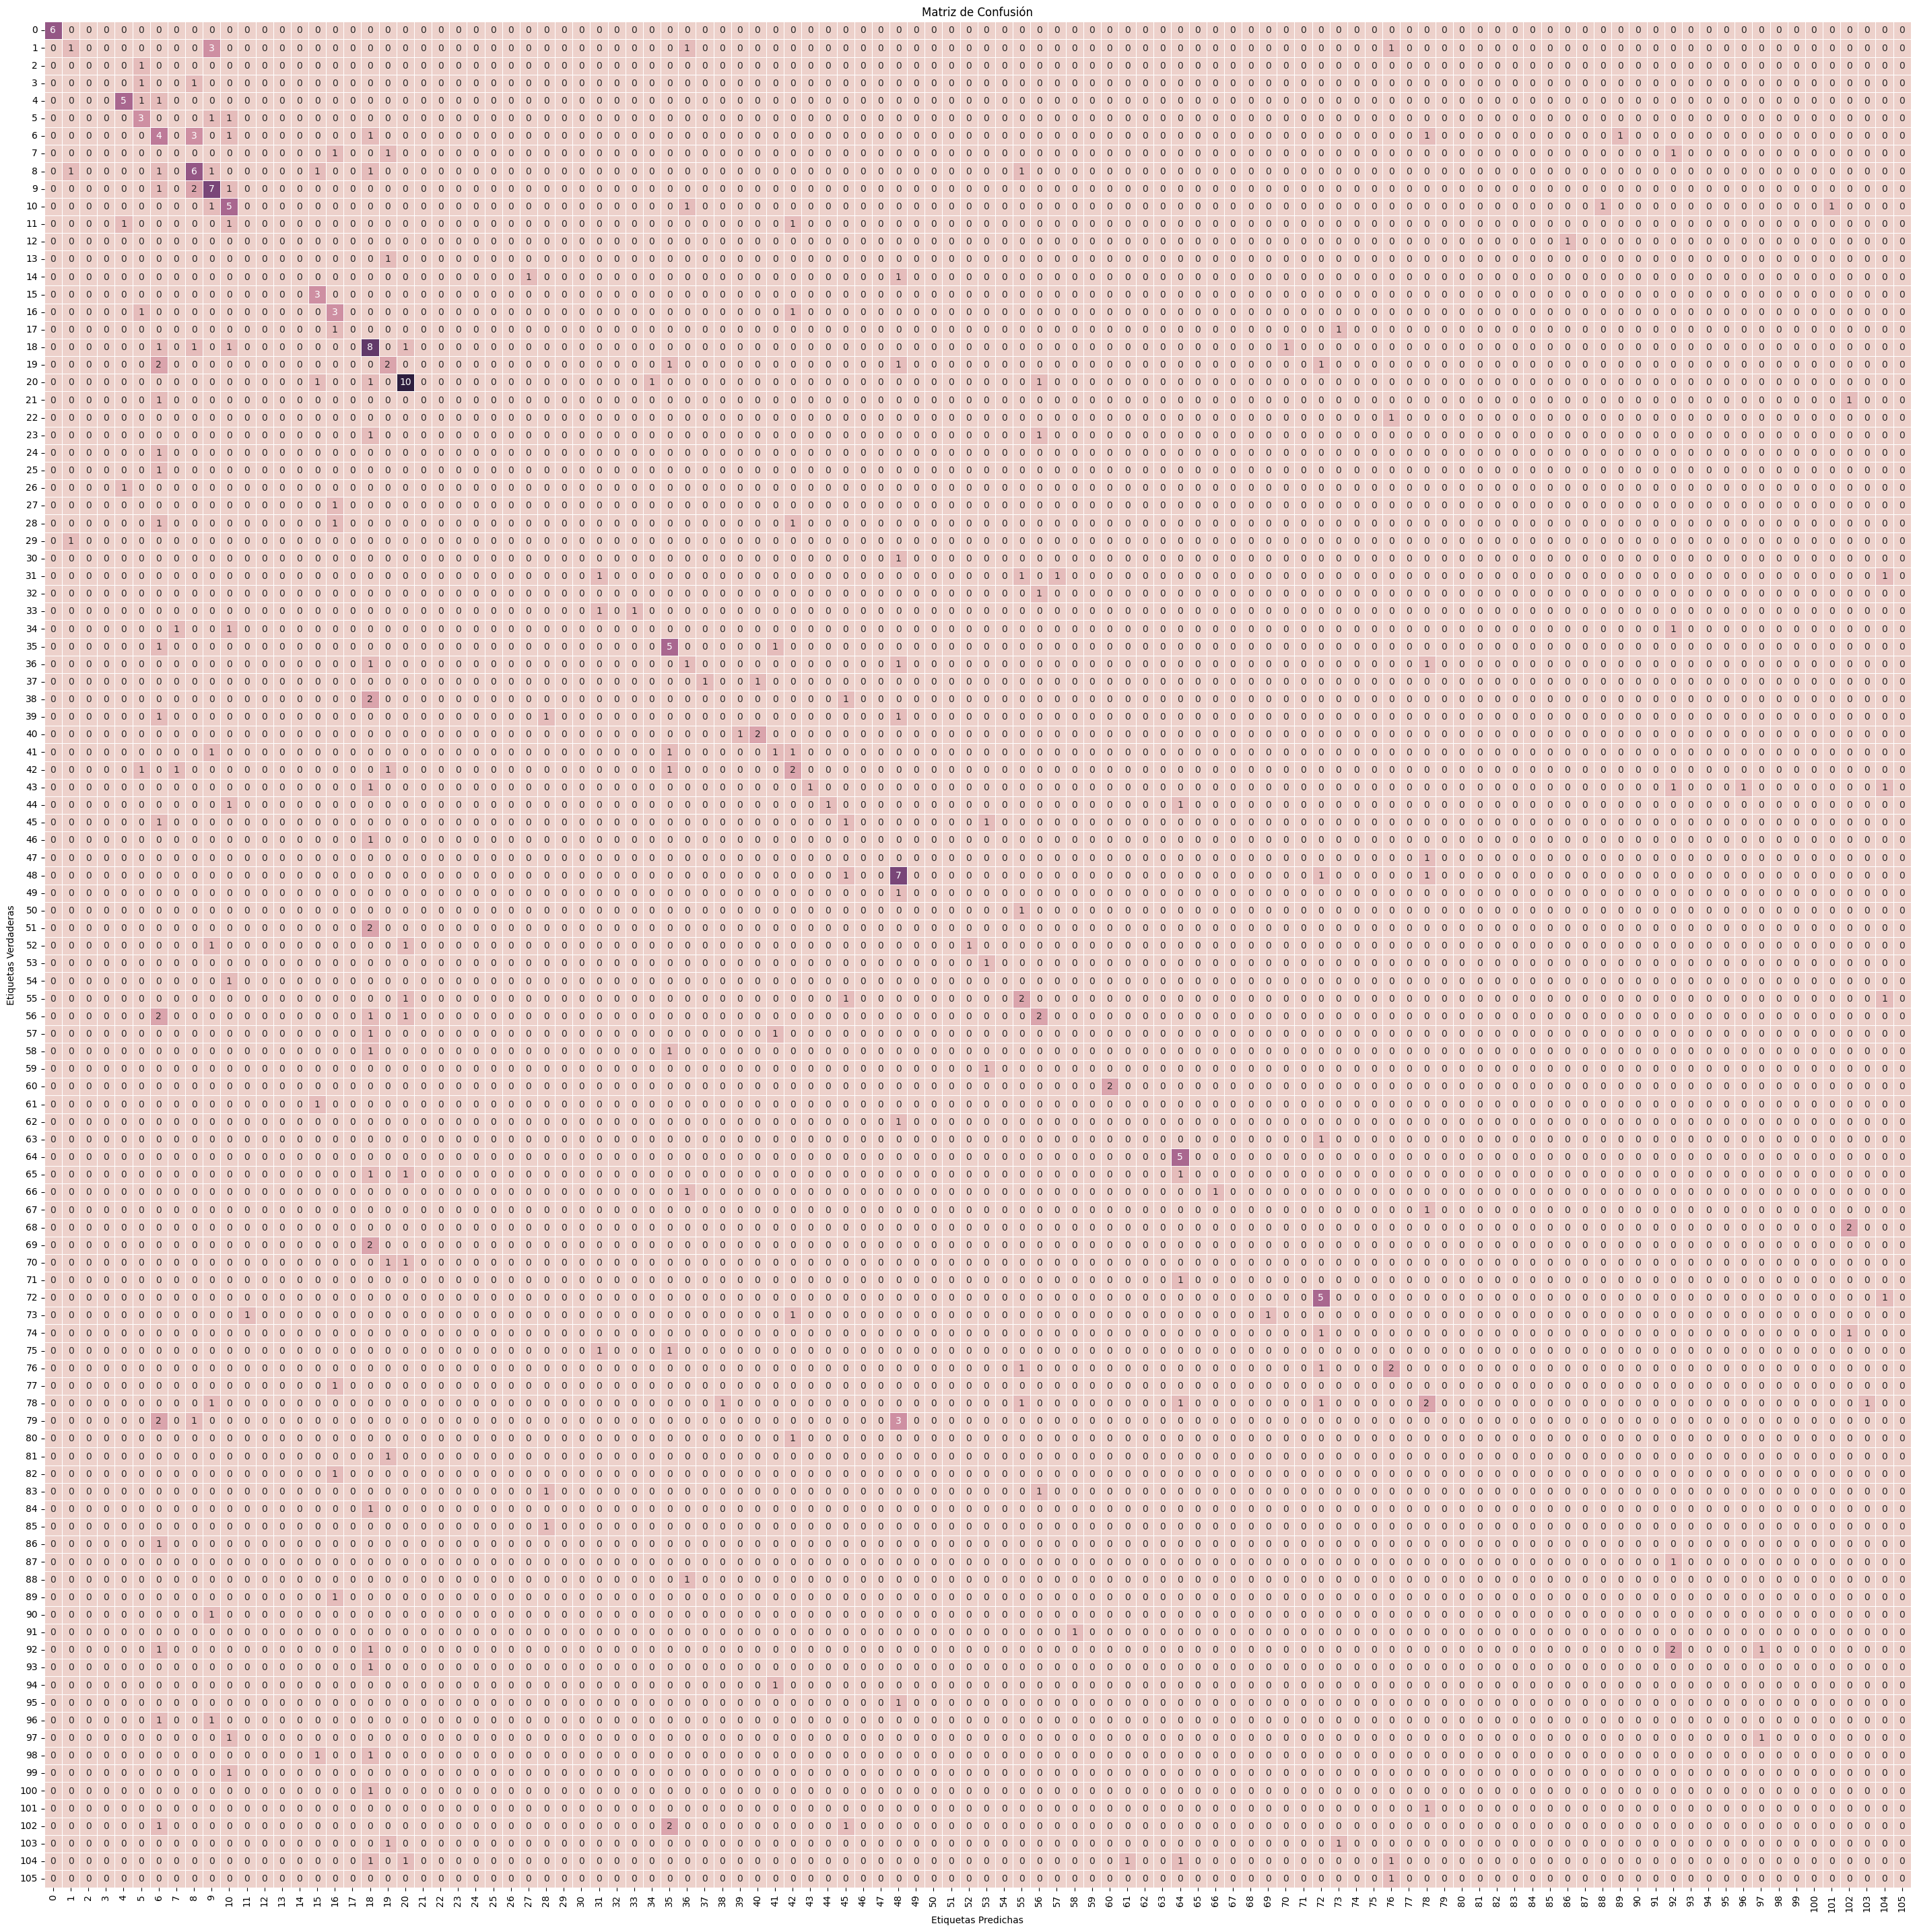

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Supongamos que ya tienes las etiquetas verdaderas y predichas
# test_true_labels y test_predicted_labels

C = confusion_matrix(real_labels, predicted_label_cm)

# Ajusta el tamaño de la figura
plt.figure(figsize = (36, 36))

# Utiliza un mapa de colores personalizado
cmap = sns.cubehelix_palette(as_cmap = True)

# Dibuja la matriz de confusión con anotaciones y un borde
sns.heatmap(cm.numpy(), cmap = cmap, square = True, annot = True, fmt = 'd', linewidths = .5, cbar = False)

# Añade etiquetas de los ejes
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')

# Añade un título
plt.title('Matriz de Confusión')

# Muestra el gráfico
plt.show()

In [67]:
#Metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, balanced_accuracy_score

In [68]:
#Real_labels son las etiquetas reales y predicted_label son las etiquetas predichas por el modelo
accuracy = accuracy_score(real_labels, predicted_label_cm)
mcc = matthews_corrcoef(real_labels, predicted_label_cm)
bal_acc=balanced_accuracy_score(real_labels, predicted_label_cm)

print(f'Accuracy: {accuracy}')
print(f'Balanced_accuracy_score: {bal_acc}')
print(f'Matthews Correlation Coefficient: {mcc}')

Accuracy: 0.3476923076923077
Balanced_accuracy_score: 0.18710231068721636
Matthews Correlation Coefficient: 0.3336006950370088


# -><- Cambiar Directorio para el modelo  -><-

In [69]:
#Guardar el modelo entrenado.
t = time.time()

export_path = "../Models/"+modelDirectory+"/{}".format(int(t))
model.save(export_path)


export_path

INFO:tensorflow:Assets written to: ../Models/inception_v3_v1/1702497926\assets


INFO:tensorflow:Assets written to: ../Models/inception_v3_v1/1702497926\assets


'../Models/inception_v3_v1/1702497926'

In [70]:
#Cargar un modelo previamente guardado
reloaded = tf.keras.models.load_model(export_path)

In [71]:
#Realizar predicciones en las mismas imágenes con dos modelos; el modelo original, el modelo cargado.

In [72]:
result_batch = model.predict(image_batch)
reloaded_result_batch = reloaded.predict(image_batch)

1/1 [==============================] - 1s 560ms/step


In [73]:
#Calcula la máxima diferencia absoluta entre las predicciones realizadas por dos modelos
abs(reloaded_result_batch - result_batch).max()

0.0

In [74]:
reloaded_predicted_id = tf.math.argmax(reloaded_result_batch, axis=-1)
reloaded_predicted_label_batch = class_names[reloaded_predicted_id]
print(reloaded_predicted_label_batch)

['040' '016' '018' '076' '008']


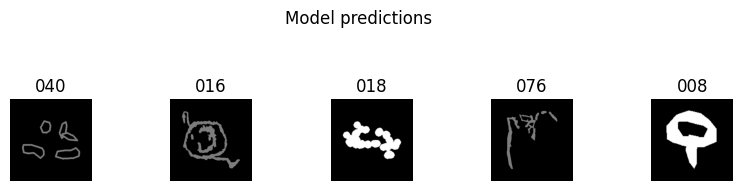

In [75]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(5):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(reloaded_predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")